In [28]:
# 导包
import re
import stylecloud
import pandas as pd
from PIL import Image
from pyecharts.charts import Bar
from pyecharts.charts import Map
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.globals import SymbolType
from pyecharts.globals import ThemeType

df = pd.read_excel('大数据工程师.xlsx')
df.head()


,招聘发布年份,招聘岗位,工作城市,工作区域,最低月薪,最高月薪,职位描述,学历要求,要求经验,招聘人数,初级分类,招聘发布日期
0,2018,大数据分析工程师,柳州,柳州,NaN,NaN,"""岗位职责：\n1、负责对数据进行收集、整理、深度分析，挖掘新能源市场方向、规律，为业务提供...",本科,11年以上,若干,其它,2018-06-08
1,2018,大数据算法工程师,成都,武侯区,10000.0,15000.0,岗位职责: 1. 互联网大数据场景下的机器学习解决方案设计和开发； 2. 对海量业务数据进行...,本科,1-3年,若干,算法工程师,2018-08-10
2,2018,大数据工程师,杭州,余杭区,15000.0,25000.0,"岗位职责: 1.参与大数据架构设计,搭建和维护 2.参与数据仓库的建设 3.参与和指导ETL...",本科,不限,若干,NaN,2018-04-05
3,2018,大数据开发,上海,虹口区,12000.0,20000.0,岗位职责： 1、参与数据仓库（大数据方向）ETL的代码开发及优化； 2、负责数据接收及数据质...,本科,3-5年,若干,数据仓库,2018-08-08
4,2021,大数据开发工程师,福州,NaN,15000.0,25000.0,岗位职责：1.负责数据平台核心引擎的开发与优化2.负责数据接入系统、数据查询系统的开发与维护...,本科,3年以上,1,NaN,2021-08-02


In [29]:
df.isnull().sum()

招聘发布年份       0
招聘岗位         0
工作城市         1
工作区域       868
最低月薪        75
最高月薪       100
职位描述         1
学历要求         0
要求经验         7
招聘人数      1114
初级分类      1512
招聘发布日期       0
dtype: int64

In [30]:
# df['招聘结束年份'].fillna(df['招聘发布年份'],inplace=True)
df['最低月薪'].fillna('8000',inplace=True)
df['最高月薪'].fillna('12000',inplace=True)
df['招聘岗位'].fillna('不限',inplace=True)
df['要求经验'].fillna('不限',inplace=True)
df['工作城市'].fillna('全市',inplace=True)
df['工作区域'].fillna(df['工作城市'], inplace=True)
df['职位描述'].fillna('不限',inplace=True)
df['招聘人数'].fillna('1',inplace=True)
df['初级分类'].fillna('其他',inplace=True)
df['学历要求'].fillna('不限',inplace=True)
df['工作区域'].fillna(df['工作城市'], inplace=True)
df['招聘发布日期'].fillna(df['招聘发布年份'],inplace=True)
df.isnull().sum()

招聘发布年份    0
招聘岗位      0
工作城市      0
工作区域      0
最低月薪      0
最高月薪      0
职位描述      0
学历要求      0
要求经验      0
招聘人数      0
初级分类      0
招聘发布日期    0
dtype: int64

In [31]:
df1 = df.copy()
df1.duplicated().sum()

157

In [32]:
df1.drop_duplicates()
df1.shape

(1989, 12)

In [33]:
df1.drop_duplicates(inplace=True)
df1.shape

(1832, 12)

In [34]:
def add_city_suffix(city):
    # 特殊情况，直接返回原名称
    if city in ['全国', '海外', '其他', '澳门', '香港', '雄安新区', '仙桃', '天门', '济源', '三沙']:
        return city
    
    # 以“县”、“州”、“地区”、“盟”、“特别行政区”、“新区”、“自治州”、“自治县”等结尾的名称，不加“市”
    if city.endswith(('地区', '盟', '特别行政区', '新区', '自治州', '自治县', '黎族自治县', '壮族苗族自治州', '布依族苗族自治州', '藏族自治州', '傣族自治州', '哈萨克自治州', '傈僳族自治州', '彝族自治州', '回族自治州', '朝鲜族自治州', '蒙古自治州', '俄罗斯族乡')):
        return city
    
#     # 地级市名称保持不变
#     if city in ['温州', '福州']:
#         return city
    
    # 普通城市名称后加上“市”
    return city + '市'

# 应用函数
df1['工作城市'] = df1['工作城市'].apply(add_city_suffix)

In [35]:
df['工作区域'].fillna(df['工作城市'], inplace=True)

In [36]:
import pandas as pd
import numpy as np

# 假设df1是您的DataFrame，且'招聘人数'列包含需要处理的数据
# ... (这里是df1的初始化或加载代码)

# 使用map和lambda函数替换'若干'和'不限'为30，并去掉'人'
df1['招聘人数'] = df1['招聘人数'].map(lambda x: str(x).replace('若干', '20').replace('不限', '20').replace('人', ''))

# 将'招聘人数'列转换为整数类型
# 注意：此时我们假设所有的替换都已经完成，且所有值都能转换为整数
df1['招聘人数'] = df1['招聘人数'].astype(int)

# 检查转换结果
print(df1['招聘人数'].head())


0    20
1    20
2    20
3    20
4     1
Name: 招聘人数, dtype: int32


In [37]:
df1['最低月薪'] = df1['最低月薪'].apply('float64')
df1['最高月薪'] = df1['最高月薪'].apply('float64')
df1['招聘人数'] = df1['招聘人数'].apply('float64')
df1[['最低月薪','最高月薪','招聘人数']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1832 entries, 0 to 1988
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   最低月薪    1832 non-null   float64
 1   最高月薪    1832 non-null   float64
 2   招聘人数    1832 non-null   float64
dtypes: float64(3)
memory usage: 57.2 KB


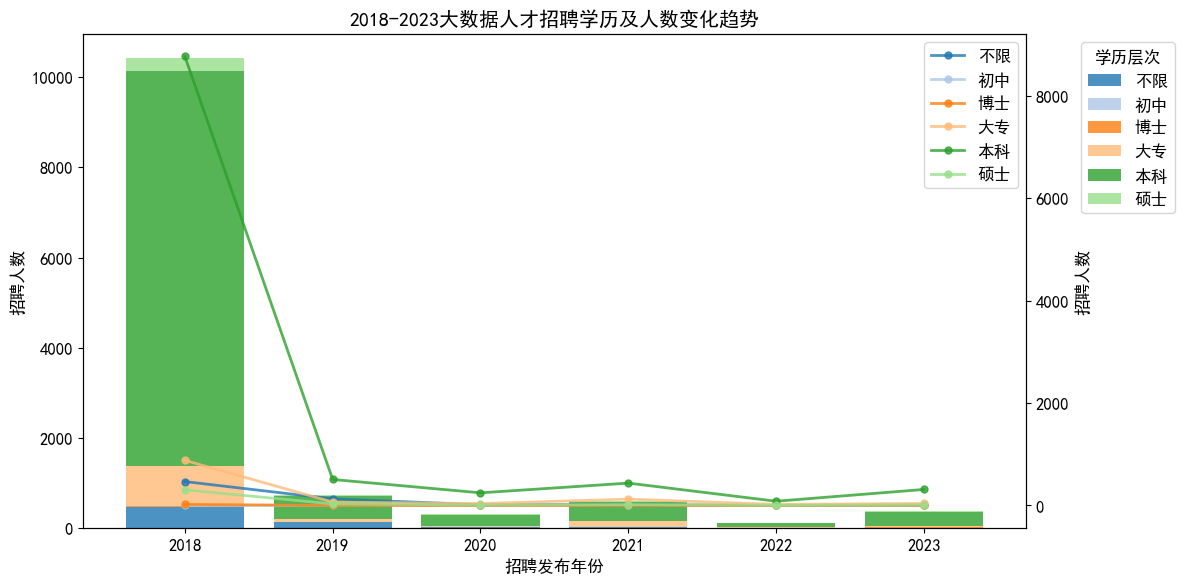

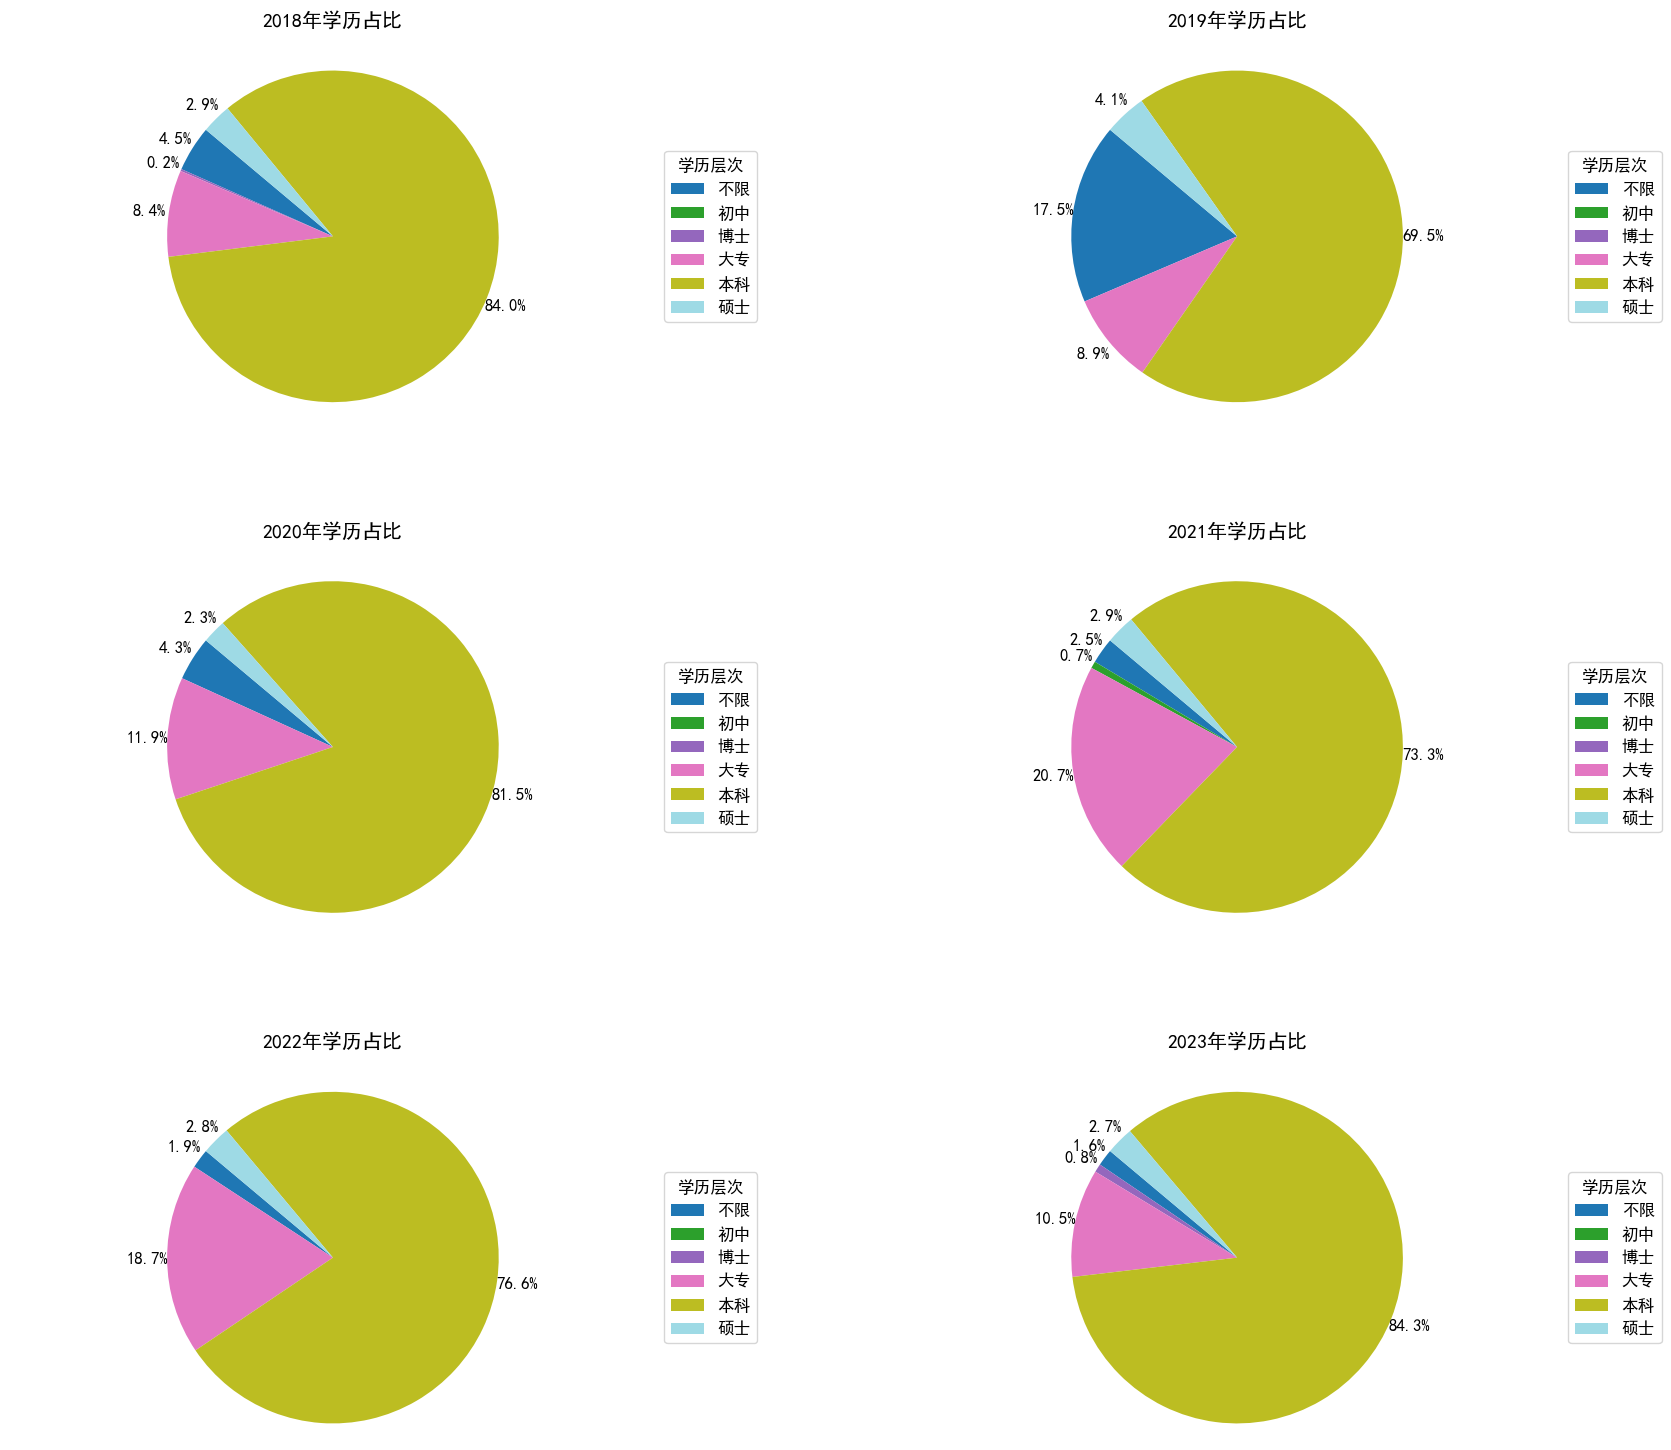

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax1.bar(years, values[:, i], bottom=bottom, label=edu, color=plt.cm.tab20(i % 20), alpha=0.8)
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("2018-2023大数据人才招聘学历及人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个学历层次，绘制折线图
for i, edu in enumerate(educations):
    ax2.plot(years, values[:, i], color=plt.cm.tab20(i % 20), linestyle='-', linewidth=2, marker='o', markersize=5, label=edu, alpha=0.8)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的学历占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示学历
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.tab20(np.linspace(0, 1, len(educations))),  # 使用tab20颜色映射
        pctdistance=1.12,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加学历层次作为图例
    ax.legend(
        wedges, educations, 
        title="学历层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年学历占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()

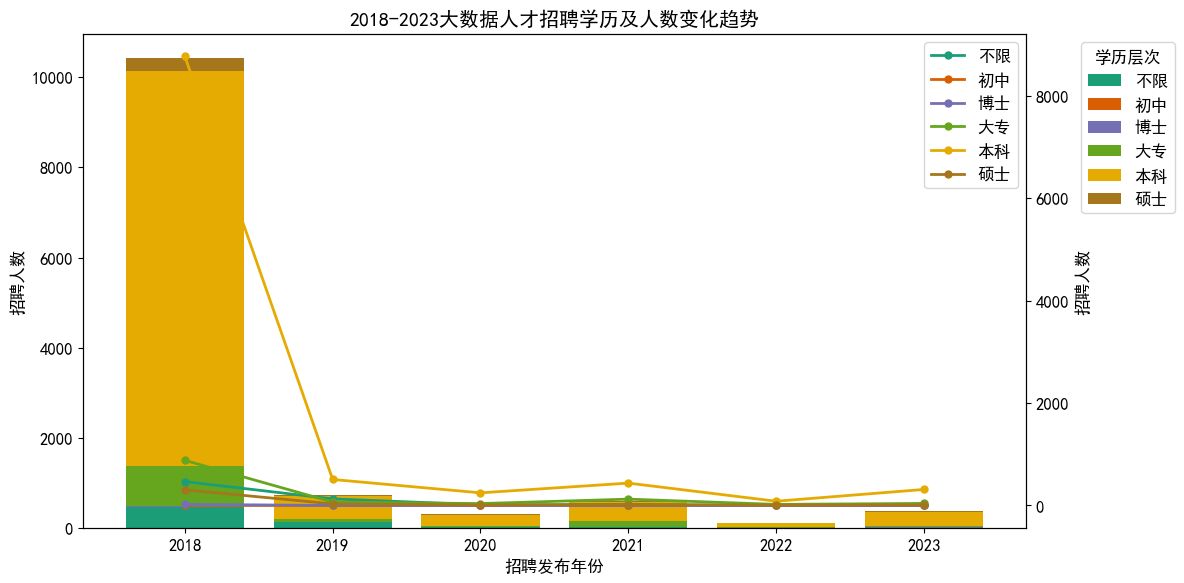

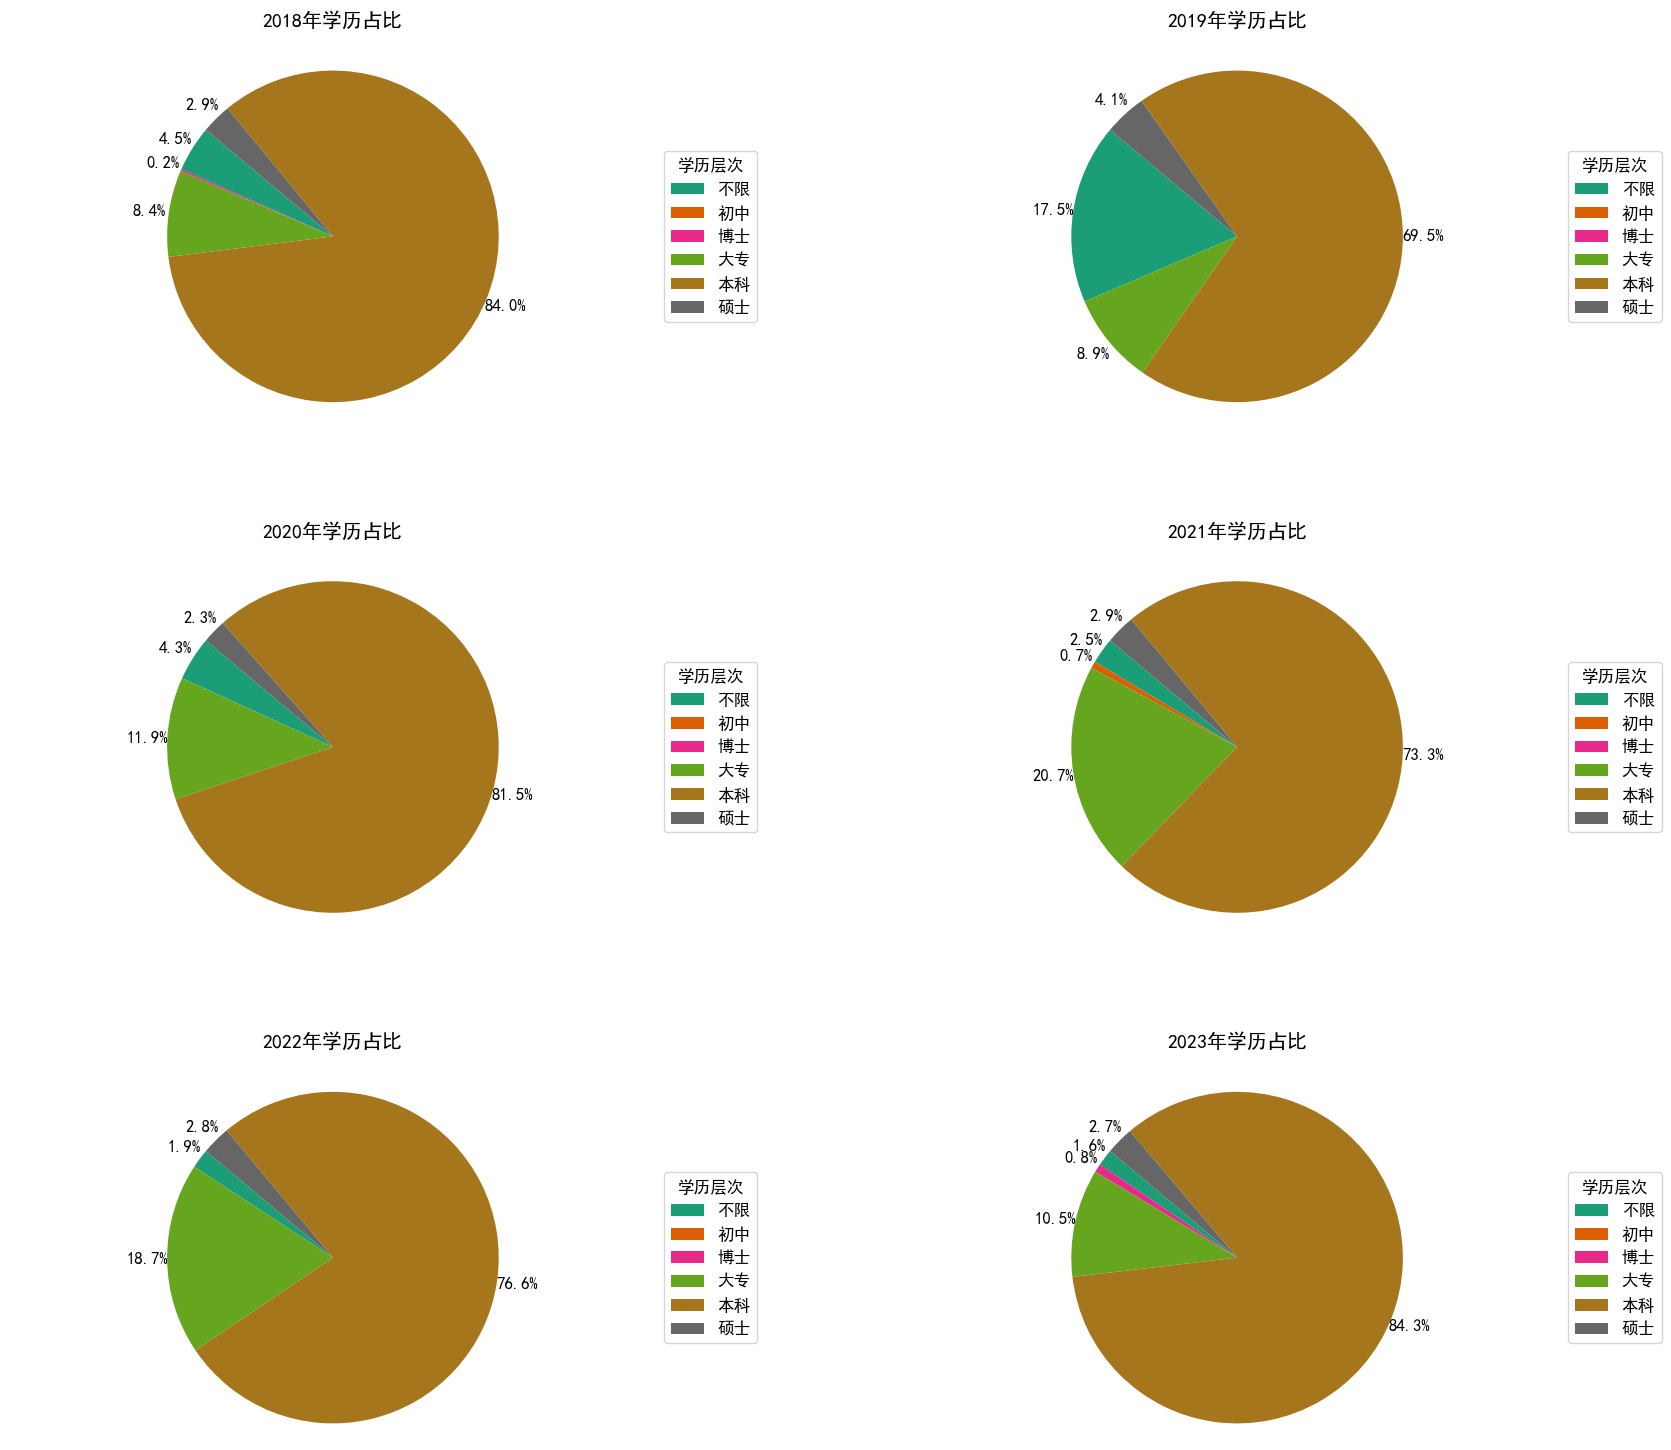

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

EDUCATION_MAP = {
    '不限': ['小学', '不限', '其他', '学历不限'],
    '中专': [
        '中专职中技校', '中专职高技校', '中职', '中专/技校', '中专\n', '中专/中技以上', 
        '职高/技校', '中技以上', '中专', '中技', '中专以上', '中专以下', '中专,技校', 
        '中专/中技', '中技/中专', '中专/中技及以上', '中专及以上', '中专及以下', '中专,大专', '技校'
    ],
    '初中': ['初中及以下', '初中以上', '初中\n', '初中以下'],    
    '高中': ['高中学历', '高中', '高中以上', '高中以下', '职高'],
    '大专': ['大专及以上', '大专\n', '大专以上', '专科'],
    '本科': ['统招本科', '本科', '本科以上', '本科及以上', '本科\n'],
    '硕士': ['研究生', '硕士以上', '硕士\n', '硕士以上', '硕士及以上','MBA及以上', 'EMBA', 'MBA', 'MBA/EMBA'], 
    '博士': ['博士研究生', '博士以上', '博士\n','博士后'],   
}

# 合并学历层次的函数
def merge_education_levels(education_level):
    for key, values in EDUCATION_MAP.items():
        if education_level in values:
            return key
    return education_level  # 确保其它情况返回自身

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并学历的函数
df1['合并学历'] = df1['学历要求'].apply(merge_education_levels)

# 根据 '招聘发布年份' 和 '合并学历' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并学历'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
educations = grouped.columns  # 学历层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个学历层次，绘制堆叠柱状图
for i, edu in enumerate(educations):
    ax1.bar(years, values[:, i], bottom=bottom, label=edu, color=plt.cm.Dark2(i / len(educations)))
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("2018-2023大数据人才招聘学历及人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="学历层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个学历层次，绘制折线图
for i, edu in enumerate(educations):
    ax2.plot(years, values[:, i], color=plt.cm.Dark2(i / len(educations)), linestyle='-', linewidth=2, marker='o', markersize=5, label=edu)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的学历占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示学历
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.Dark2(np.linspace(0, 1, len(educations))),  # 使用Dark2颜色映射
        pctdistance=1.12,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加学历层次作为图例
    ax.legend(
        wedges, educations, 
        title="学历层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年学历占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()

In [13]:
df1['要求经验'].unique()

array(['11年以上', '1-3年', '不限', '3-5年', '3年以上', '应届毕业生', '三年工作经验', '5-10年',
       '1年以下', '5-7年经验', '应届生', '3-4年经验', '2年以上', '二年工作经验', '1年以上',
       '0年以上', '5年以上', '10年以上', '经验不限', '无工作经验', '13年以上', '4年以上', '1年经验',
       '2年', '无经验', '2年经验', '6年以上', '8年以上', '3年经验', '1年以内', '7年以上',
       '2年及以上', '10年及以上', '3-4年', '在校/应届', '五年工作经验', '1年', '3年及以上',
       '1-2年'], dtype=object)

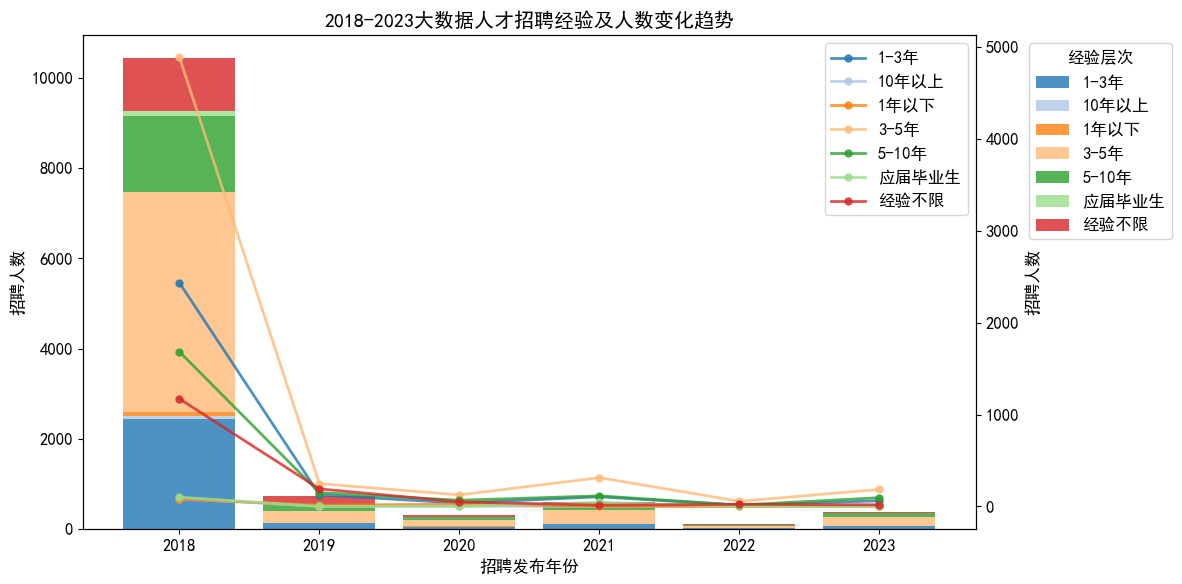

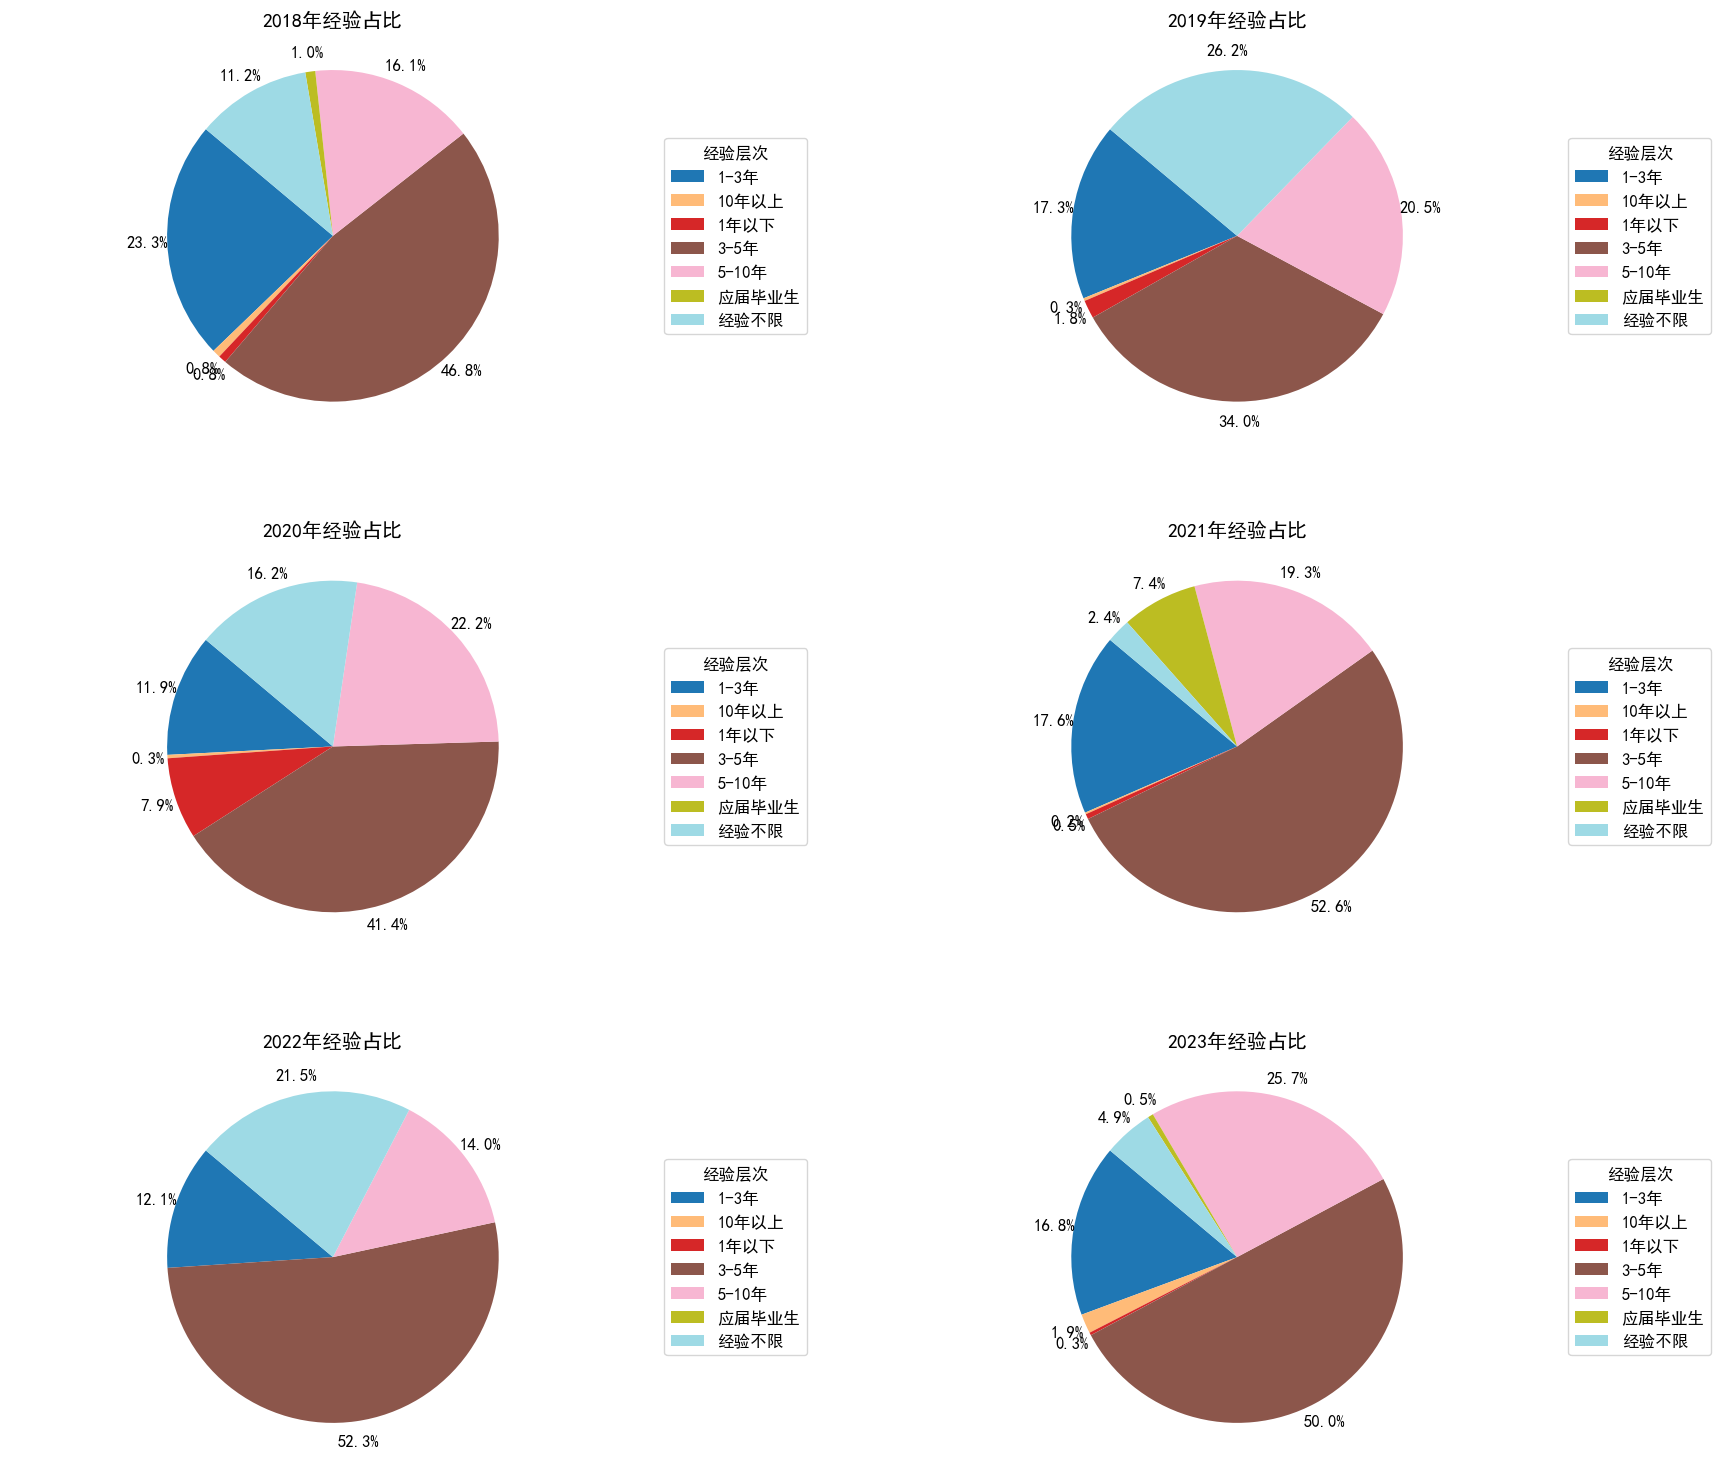

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体为支持中文的字体
plt.rcParams['font.family'] = 'SimHei'  # 指定字体为黑体
plt.rcParams['font.size'] = 12         # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义经验要求的映射字典
EXPERIENCE_MAP = {
    '经验不限': ['无工作经验', '无经验', '0年以上', '经验不限', '不限'],
    '应届毕业生': ['应届毕业生', '应届生', '在校/应届'],
    '1年以下': ['1年以下', '1年经验', '1年以内', '1年'],
    '1-3年': ['1-3年', '1年以上', '1-2年', '2年', '2年经验', '2年及以上', '二年工作经验', '三年工作经验', '2年以上'],
    '3-5年': ['3-5年', '3年以上', '3年经验', '3年及以上', '3-4年', '3-4年经验', '4年以上'],
    '5-10年': ['5-10年', '5年以上', '5-7年经验', '6年以上', '7年以上', '8年以上', '9年以上', '五年工作经验'],
    '10年以上': ['10年以上', '10年及以上', '11年以上', '13年以上']
}

# 合并经验要求的函数
def merge_experience_levels(experience_level):
    for key, values in EXPERIENCE_MAP.items():
        if experience_level in values:
            return key
    return experience_level  # 如果没有匹配到，返回原始值

# 假设 df1 是已经加载好的 DataFrame
# df1 = pd.read_csv('path_to_your_data.csv')  # 加载数据的代码（如果需要的话）

# 应用合并经验的函数
df1['合并经验'] = df1['要求经验'].apply(merge_experience_levels)

# 根据 '招聘发布年份' 和 '合并经验' 进行分组，并汇总招聘人数
grouped = df1.groupby(['招聘发布年份', '合并经验'])['招聘人数'].sum().unstack().fillna(0)

# 转换数据格式
years = grouped.index  # 年份
experiences = grouped.columns  # 经验层次
values = grouped.values  # 招聘人数

# 绘制堆叠柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 初始化底部位置
bottom = np.zeros(len(years))

# 遍历每个经验层次，绘制堆叠柱状图
for i, exp in enumerate(experiences):
    ax1.bar(years, values[:, i], bottom=bottom, label=exp, color=plt.cm.tab20(i % 20), alpha=0.8)
    bottom += values[:, i]  # 更新底部位置

# 添加标题和标签
ax1.set_title("2018-2023大数据人才招聘经验及人数变化趋势")
ax1.set_xlabel("招聘发布年份")
ax1.set_ylabel("招聘人数")
ax1.set_xticks(years)
ax1.legend(title="经验层次", bbox_to_anchor=(1.05, 1), loc='upper left')

# 创建第二个y轴来绘制折线图
ax2 = ax1.twinx()

# 遍历每个经验层次，绘制折线图
for i, exp in enumerate(experiences):
    ax2.plot(years, values[:, i], color=plt.cm.tab20(i % 20), linestyle='-', linewidth=2, marker='o', markersize=5, label=exp, alpha=0.8)

# 添加折线图的标签
ax2.set_ylabel('招聘人数')
ax2.legend(loc='upper right')

# 调整布局
fig.tight_layout()

# 显示图表
plt.show()

# 绘制每个年份的经验占比饼图
fig, axes = plt.subplots(len(years) // 2 + len(years) % 2, 2, figsize=(20, 6 * (len(years) // 2 + len(years) % 2)))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 调整子图之间的间距

# 遍历每个年份
for i, year in enumerate(years):
    ax = axes[i // 2, i % 2]  # 确定当前饼图的位置
    year_values = values[i, :]
    
    # 绘制饼图
    wedges, texts, autotexts = ax.pie(
        year_values / year_values.sum() * 100, 
        labels=None,  # 不在饼图上直接显示经验
        autopct=lambda pct: '{:.1f}%'.format(pct) if pct > 0 else '',  # 显示百分比，过滤掉 0%
        startangle=140, 
        colors=plt.cm.tab20(np.linspace(0, 1, len(experiences))),  # 使用tab20颜色映射
        pctdistance=1.12,  # 百分比标签距离中心的距离
        labeldistance=1.2  # 数据标签距离中心的距离
    )
    
    # 添加经验层次作为图例
    ax.legend(
        wedges, experiences, 
        title="经验层次", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)  # 将图例放在右侧
    )
    
    # 设置标题
    ax.set_title(f"{year}年经验占比", pad=20)
    ax.axis('equal')  # 确保饼图是圆形的

# 隐藏多余的子图（如果总数不是偶数）
if len(years) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# 显示图表
plt.show()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.857 seconds.
Prefix dict has been built successfully.


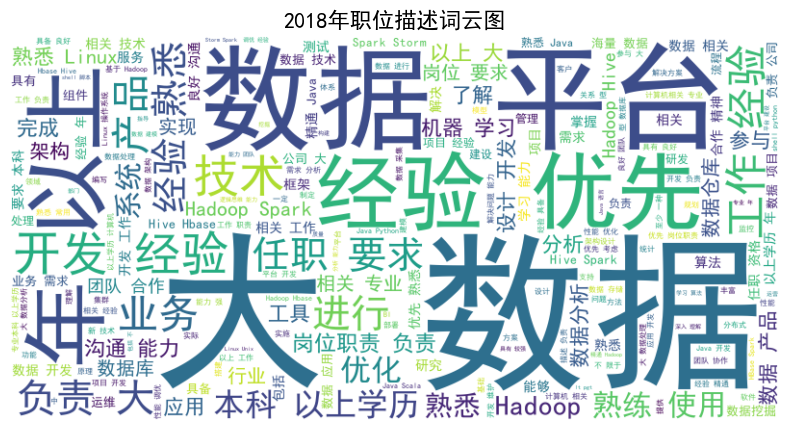

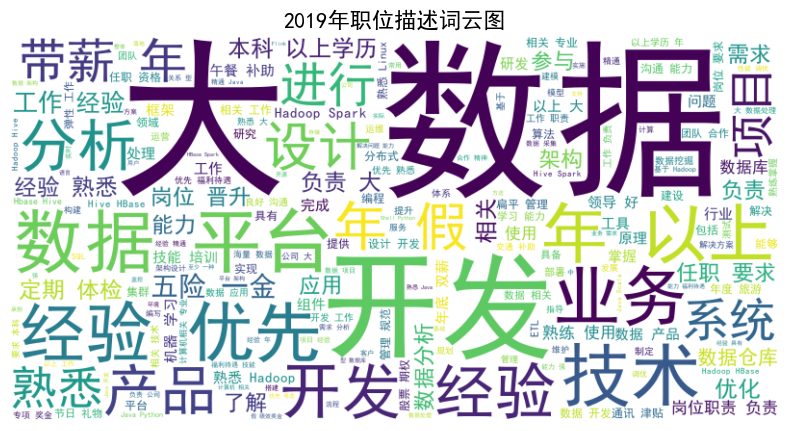

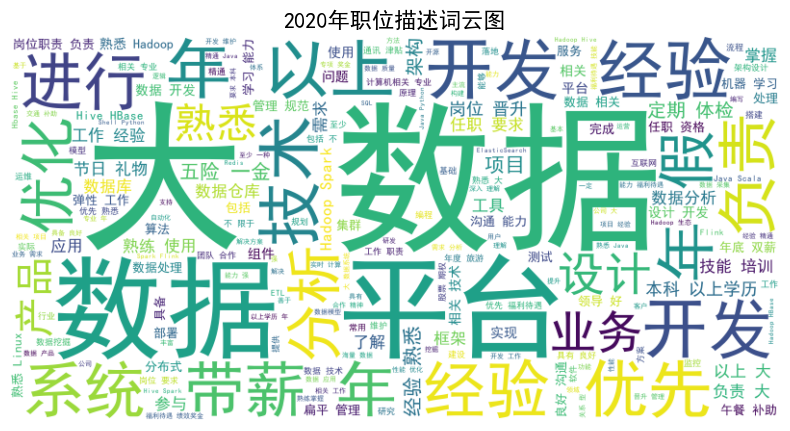

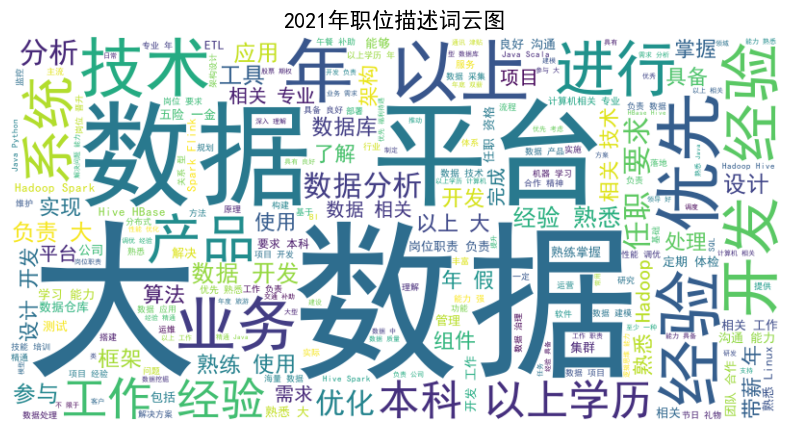

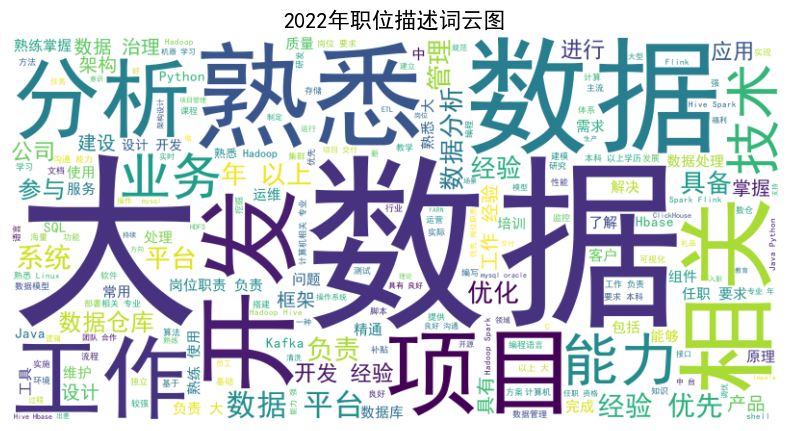

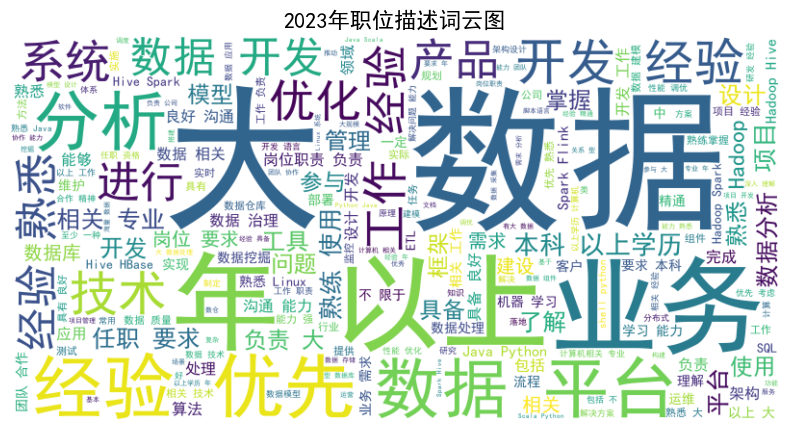

In [17]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 加载停用词表
stop_list = [line.strip() for line in open('hit_stopwords.txt', encoding='utf8').readlines()]

# 定义一个函数用于分词并去除停用词
def chinese_tokenization(text):
    words = jieba.cut(text)
    filtered_words = [word for word in words if word not in stop_list]
    return " ".join(filtered_words)

# 确保所有岗位描述都是字符串类型
df1['职位描述'] = df1['职位描述'].astype(str)

# 按照招聘发布年份分组
grouped = df1.groupby('招聘发布年份')

# 遍历每个年份，生成并显示词云图
for year, group in grouped:
    # 合并当前年份的所有岗位描述成一个字符串
    all_descriptions = " ".join(group['职位描述'].tolist())
    
    # 分词并去除停用词
    word_string = chinese_tokenization(all_descriptions)
    
    # 生成词云
    wordcloud = WordCloud(
        font_path='simhei.ttf',  # 指定中文字体路径
        width=800,
        height=400,
        background_color='white'
    ).generate(word_string)
    
    # 显示词云
    plt.figure(figsize=(10, 5))
    plt.title(f"{year}年职位描述词云图", fontsize=16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # 关闭坐标轴
    plt.show()